In [33]:
!pip install datasets scikit-learn seaborn matplotlib pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

import warnings
warnings.filterwarnings("ignore")


# **Загрузка датасета**

In [34]:
dataset = load_dataset("inria-soda/tabular-benchmark", "clf_num_bank-marketing")

dataset

DatasetDict({
    train: Dataset({
        features: ['V1', 'V6', 'V10', 'V12', 'V13', 'V14', 'V15', 'Class'],
        num_rows: 10578
    })
})

# **Преобразование в pandas**

In [35]:
df = dataset["train"].to_pandas()

df.head()

,V1,V6,V10,V12,V13,V14,V15,Class
0,52,51.0,14,935.0,2,-1.0,0,1
1,53,232.0,29,32.0,1,-1.0,0,1
2,50,525.0,18,177.0,2,-1.0,0,1
3,32,648.0,21,166.0,1,-1.0,0,1
4,58,2348.0,9,226.0,1,-1.0,0,1


# **Формулировка задачи**

In [36]:
target = "Class"
X = df.drop(columns=[target])
y = df[target]

# **EDA**

In [37]:
df.shape

(10578, 8)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10578 non-null  int64  
 1   V6      10578 non-null  float64
 2   V10     10578 non-null  int64  
 3   V12     10578 non-null  float64
 4   V13     10578 non-null  int64  
 5   V14     10578 non-null  float64
 6   V15     10578 non-null  int64  
 7   Class   10578 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 661.3 KB


In [39]:
df.isnull().sum()

,0
V1,0
V6,0
V10,0
V12,0
V13,0
V14,0
V15,0
Class,0


In [40]:
print(df[target].value_counts())
print(df[target].value_counts(normalize=True))

Class
1    5289
2    5289
Name: count, dtype: int64
Class
1    0.5
2    0.5
Name: proportion, dtype: float64


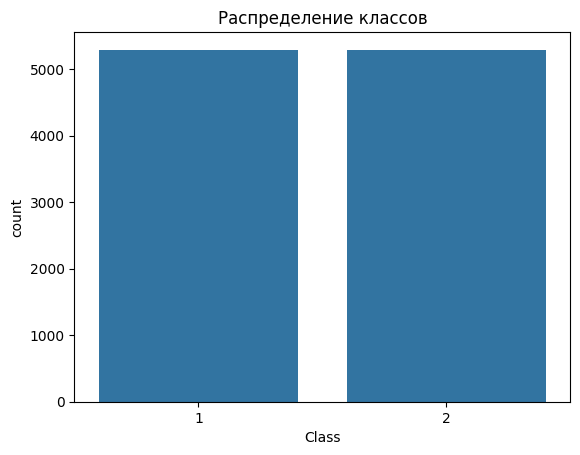

In [41]:
sns.countplot(x=target, data=df)
plt.title("Распределение классов")
plt.show()

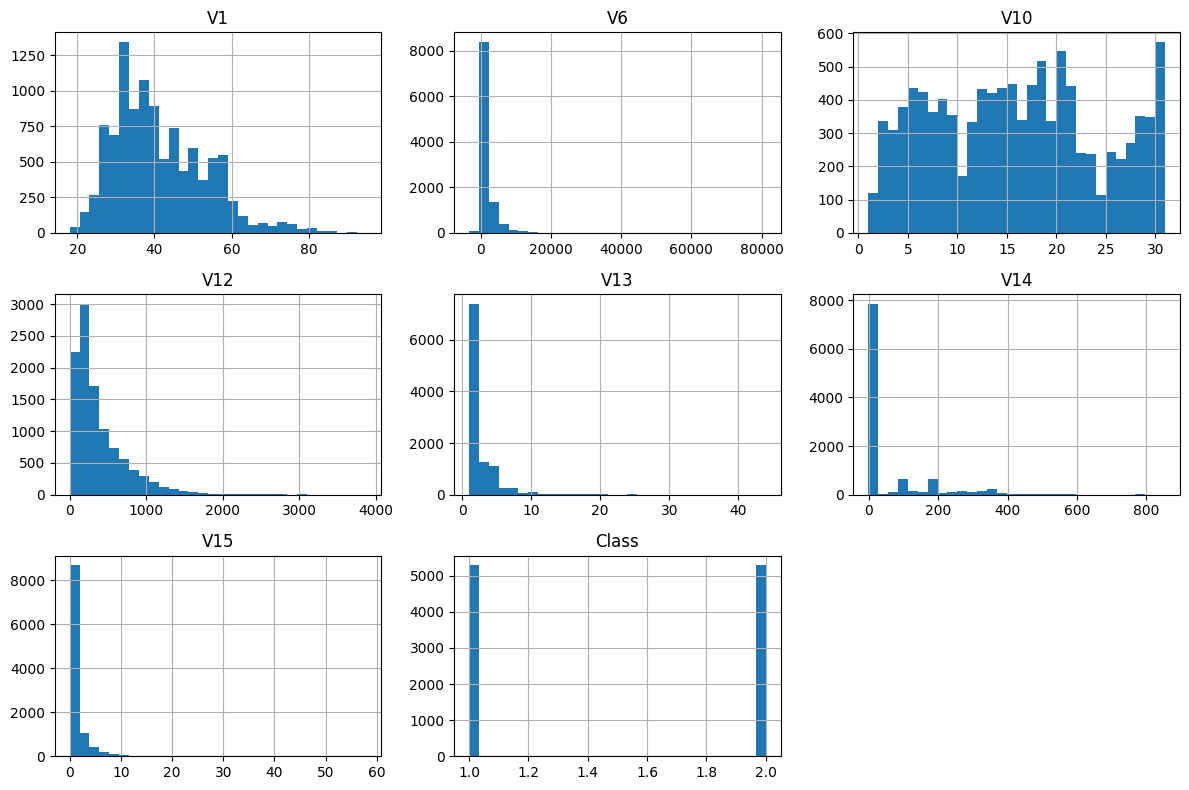

In [42]:
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

# **Предобработка**

In [43]:
numeric_features = X.columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)

# **Разделение train/test**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **Logistic Regression**

In [45]:
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)

y_pred_logreg = logreg_pipeline.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_logreg))

print("Logistic Regression F1-macro:",
      f1_score(y_test, y_pred_logreg, average="macro"))

Logistic Regression Accuracy: 0.744328922495274
Logistic Regression F1-macro: 0.7438959866323243


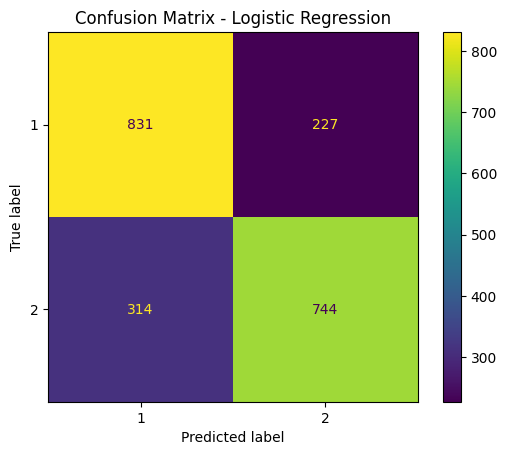

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [47]:
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_logreg))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           1       0.73      0.79      0.75      1058
           2       0.77      0.70      0.73      1058

    accuracy                           0.74      2116
   macro avg       0.75      0.74      0.74      2116
weighted avg       0.75      0.74      0.74      2116



# **Decision Tree**

In [48]:
tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

tree_pipeline.fit(X_train, y_train)

y_pred_tree = tree_pipeline.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_tree))

print("Decision Tree F1-macro:",
      f1_score(y_test, y_pred_tree, average="macro"))

Decision Tree Accuracy: 0.7244801512287334
Decision Tree F1-macro: 0.7244727053034896


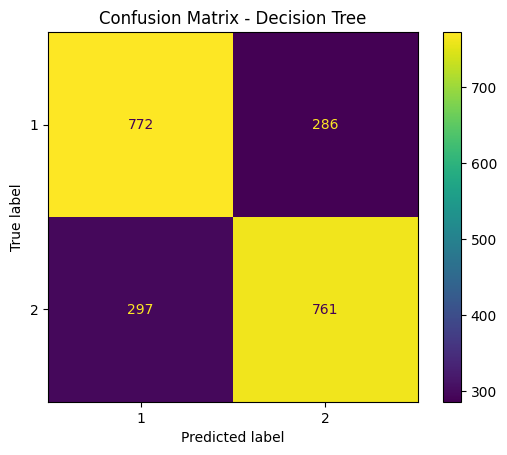

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [50]:
print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_tree))

Classification Report - Decision Tree
              precision    recall  f1-score   support

           1       0.72      0.73      0.73      1058
           2       0.73      0.72      0.72      1058

    accuracy                           0.72      2116
   macro avg       0.72      0.72      0.72      2116
weighted avg       0.72      0.72      0.72      2116



# **Эксперимент: изменение глубины дерева**

In [51]:
tree_depth_5 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42))
])

tree_depth_5.fit(X_train, y_train)

y_pred_depth5 = tree_depth_5.predict(X_test)

print("Decision Tree (max_depth=5) Accuracy:",
      accuracy_score(y_test, y_pred_depth5))

print("Decision Tree (max_depth=5) F1-macro:",
      f1_score(y_test, y_pred_depth5, average="macro"))

Decision Tree (max_depth=5) Accuracy: 0.7802457466918714
Decision Tree (max_depth=5) F1-macro: 0.7802197802197802


# **Эксперимент: удаление одного признака**

In [52]:
feature_to_remove = X.columns[0]

print("Удаляем:", feature_to_remove)

X_reduced = X.drop(columns=[feature_to_remove])

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

numeric_features_reduced = X_reduced.columns
numeric_transformer_reduced = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_reduced, numeric_features_reduced)
    ]
)

logreg_pipeline_reduced = Pipeline(steps=[
    ("preprocessor", preprocessor_reduced),
    ("classifier", LogisticRegression(max_iter=1000))
])

logreg_pipeline_reduced.fit(X_train_r, y_train_r)

y_pred_reduced = logreg_pipeline_reduced.predict(X_test_r)
print("LogReg без признака Accuracy:",
      accuracy_score(y_test_r, y_pred_reduced))
print("LogReg без признака F1-macro:",
      f1_score(y_test_r, y_pred_reduced, average="macro"))


Удаляем: V1
LogReg без признака Accuracy: 0.7405482041587902
LogReg без признака F1-macro: 0.7401483972838345
